In [1]:
# All imports go here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# Setup Pandas
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 300)
pd.set_option('display.notebook_repr_html', True)
pd.options.display.max_colwidth = 100

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('text_emotion.csv')

In [3]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


In [4]:
df.describe(include='all')

,tweet_id,sentiment,author,content
count,4.000000e+04,40000,40000,40000
unique,NaN,13,33871,39827
top,NaN,neutral,MissxMarisa,I just received a mothers day card from my lovely daughter wishing my a happy mothers day http:...
freq,NaN,8638,23,14
mean,1.845184e+09,NaN,NaN,NaN
std,1.188579e+08,NaN,NaN,NaN
min,1.693956e+09,NaN,NaN,NaN
25%,1.751431e+09,NaN,NaN,NaN
50%,1.855443e+09,NaN,NaN,NaN
75%,1.962781e+09,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


## Data Wrangling & Cleaning & Visualization

In [6]:
df.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [7]:
df[df.sentiment == 'happiness'][['sentiment','content']].head(10)

,sentiment,content
40,happiness,mmm much better day... so far! it's still quite early. last day of #uds
69,happiness,"So great to see Oin &amp; Cynthia. So happy. Dinner was great, cute little place. Too bad Oin..."
77,happiness,"@havingmysay dude, that is my favorite sandwich place ever. ummm did you take PICTURES?"
126,happiness,Need to pack for CALI CALI! Cannot waittt! Thinking a glass of wine is in order to celebrate my ...
233,happiness,"took a math test today. The day before the test, the teacher says bring your calculator. Luke wa..."
234,happiness,"omg, the concert was awesome, madrigals gave me chills on almost every piece...brooks also calle..."
246,happiness,"I Can`t do 30 minutes of Treadmill but done 30 minutes for today already, gonna do 20 minutes more"
250,happiness,Chillin with the roomies. Can't wait for the zombie CLWN CR. Its gonna be 6-8 weeks
293,happiness,@vinylvickxen i kno i doooo!!!!!!!!!! yall partyin with out me
308,happiness,I spilled my beer all over my leg. Wasted half my beer. Home now. I met a cute girl. Good conve...


In [8]:
df[df.sentiment == 'sadness'][['sentiment','content']].head(10)

,sentiment,content
1,sadness,Layin n bed with a headache ughhhh...waitin on your call...
2,sadness,Funeral ceremony...gloomy friday...
6,sadness,"I should be sleep, but im not! thinking about an old friend who I want. but he's married now. da..."
8,sadness,@charviray Charlene my love. I miss you
9,sadness,@kelcouch I'm sorry at least it's Friday?
12,sadness,Ugh! I have to beat this stupid song to get to the next rude!
13,sadness,@BrodyJenner if u watch the hills in london u will realise what tourture it is because were week...
15,sadness,The storm is here and the electricity is gone
17,sadness,So sleepy again and it's not even that late. I fail once again.
19,sadness,How are YOU convinced that I have always wanted you? What signals did I give off...damn I think ...


In [9]:
df[df.sentiment == 'neutral'][['sentiment','content']].head(10)

,sentiment,content
4,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."
10,neutral,cant fall asleep
22,neutral,No Topic Maps talks at the Balisage Markup Conference 2009 Program online at http://tr.im/mL6Z...
31,neutral,@cynthia_123 i cant sleep
32,neutral,I missed the bl***y bus!!!!!!!!
33,neutral,feels strong contractions but wants to go out. http://plurk.com/p/wxidk
34,neutral,SoCal! stoked. or maybe not.. tomorrow
35,neutral,Screw you @davidbrussee! I only have 3 weeks...
38,neutral,has work this afternoon
39,neutral,@GABBYiSACTiVE Aw you would not unfollow me would you? Then I would cry


In [10]:
df['preCleaningLen'] = [len(t) for t in df.content]

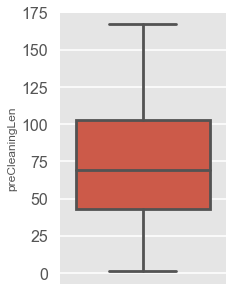

In [11]:
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(3, 5))

sns.boxplot(y=df.preCleaningLen)
plt.show()

In [12]:
df[df.preCleaningLen > 140].head(10)

,tweet_id,sentiment,author,content,preCleaningLen
79,1956985758,worry,jazz_angela,"@shondarhimes Sure you will tweet about this when you're back, but news is abuzz about TR Knight...",148
89,1956987950,worry,smiles4dayyz,.. I'm suppposed to be sleep. But i got some much to do. &amp; i got that one part of the song s...,151
371,1957050890,sadness,queenbmakeup,@imjustlalayone damn girl I'm so down but ya gotta let me know so I can get my kit together &amp...,145
635,1957114604,hate,Fiibs,"back at Vienna ( ), sooo tired, luggage lost, Manchester 'd been great - very good outcome from...",141
660,1957119780,love,johnholdun,"@IkramShahnawaz Oh I love 'em, but when I think about the kind of preservatives they're using to...",147
879,1957165693,love,shagreenxo,@AnnetteStatus I luv urs! admitting niley with a kiss (: but then they change their minds haha ...,142
1239,1957249164,worry,karinamack,Is feeling really bad about goofin' on @NinaParkerTMZ not knowing she really wasn't at the meeti...,141
1384,1957291305,anger,msfussybritches,&quot;locked up abroad&quot; makes bein half brown good risk mgmt when travelin 3rd world. i ble...,145
1557,1957339420,love,PaulinePiso,Jus Got Hom Fr. TDa Funeral... I'm So Sad! I Cried So Much Times! Much Love Grandpa!&lt;3 I Neve...,144
1622,1957355196,relief,Babii_J,"Bout 2 lay iit down, got a head ache @niariley we hangin tomorrow idont care wat u say lol..so...",141


In [13]:
df[df.preCleaningLen > 140].content.count()

360

At the time of data scraping, Tweeter only allowed 140 characters to tweet. So there may be some problem on 360 tweets because the length of the tweets are longer than 140.

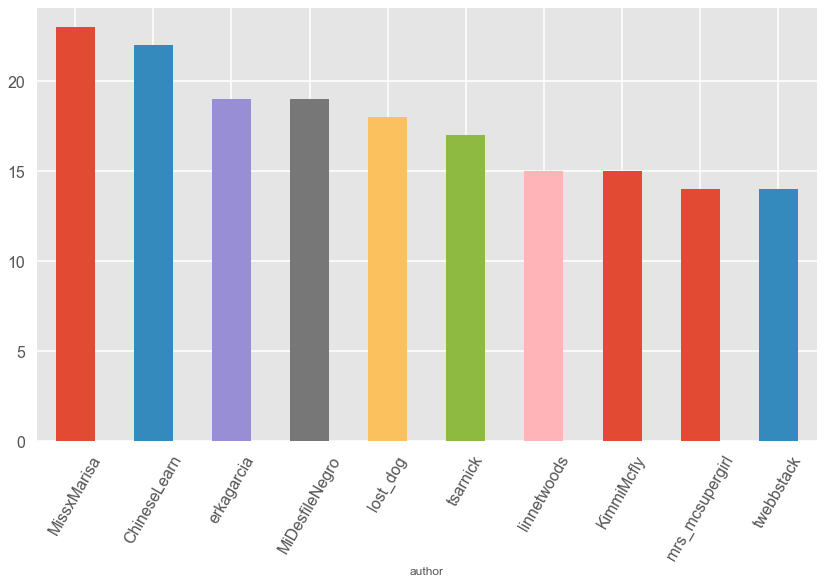

In [14]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(14,8))
df.groupby('author').author.count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=60)
plt.show()

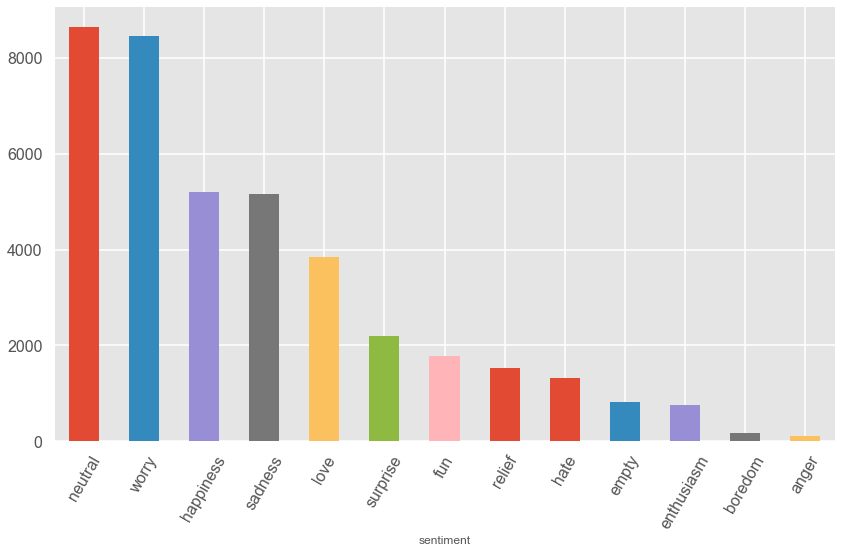

In [15]:
plt.subplots(figsize=(14,8))

df.groupby('sentiment')['content'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=60)
plt.show()

In [16]:
from nltk.tokenize import WordPunctTokenizer
import re
from bs4 import BeautifulSoup



wordpunctok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'

combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        quotRem = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        quotRem = souped
    stripped = re.sub(combined_pat, '', quotRem)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)

    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in wordpunctok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()


df['Cleaned'] = df.content.apply(tweet_cleaner)

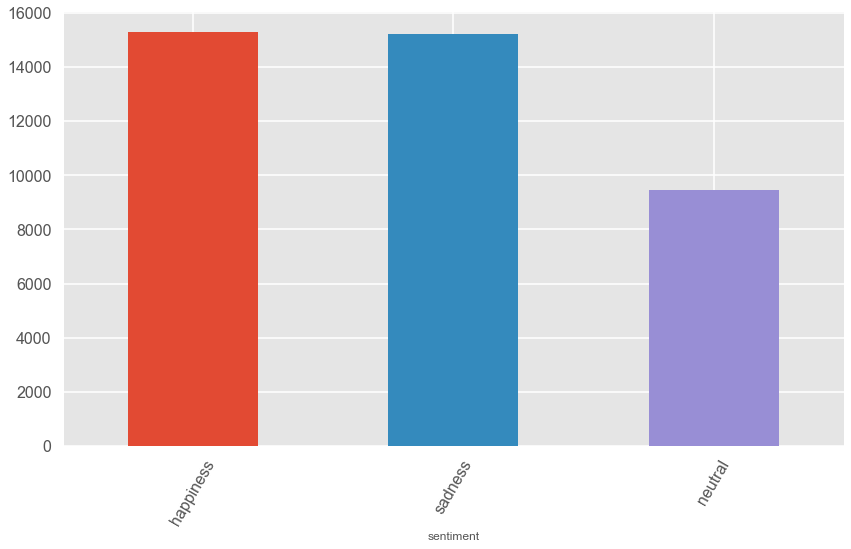

In [17]:
dfRep = df.copy()
dfRep.sentiment.replace(['anger','boredom','enthusiasm','empty','hate','relief','fun','suprise','love','surprise',
                         'worry'],
                    ['sadness','sadness','happiness','neutral','sadness','happiness','happiness','happiness',
                     'happiness', 'happiness','sadness'],
                       inplace=True)

plt.subplots(figsize=(14,8))

dfRep.groupby('sentiment')['content'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=60)
plt.show()

In [18]:
SentimentMap = {'sadness':0,'neutral':2,'happiness':4}

dfRep = dfRep.replace({'sentiment':SentimentMap})

## Word Cloud

### Happiness

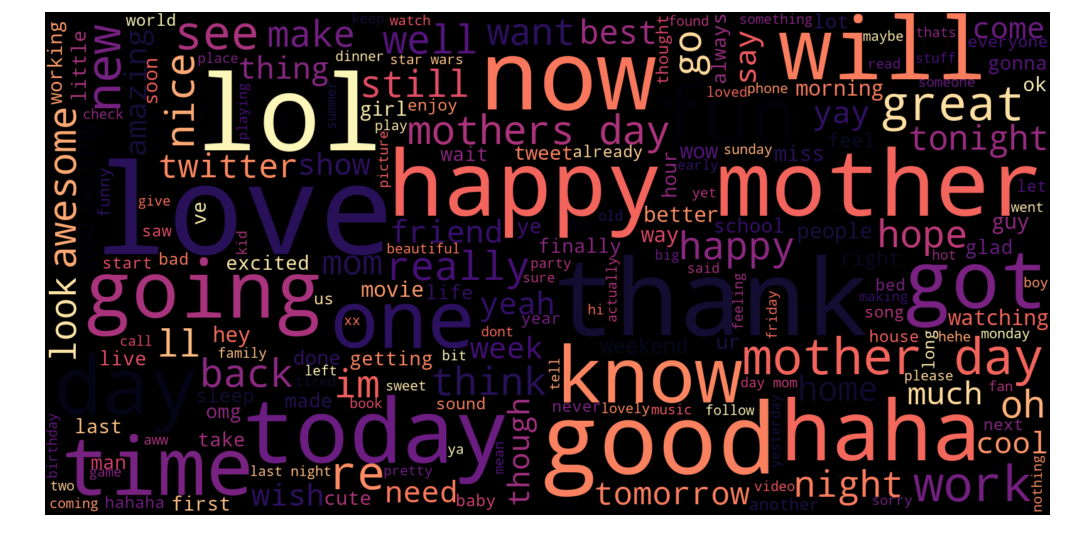

In [19]:
from wordcloud import WordCloud


wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').\
generate(dfRep[dfRep.sentiment==4].Cleaned.str.cat(sep=' '))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Sadness

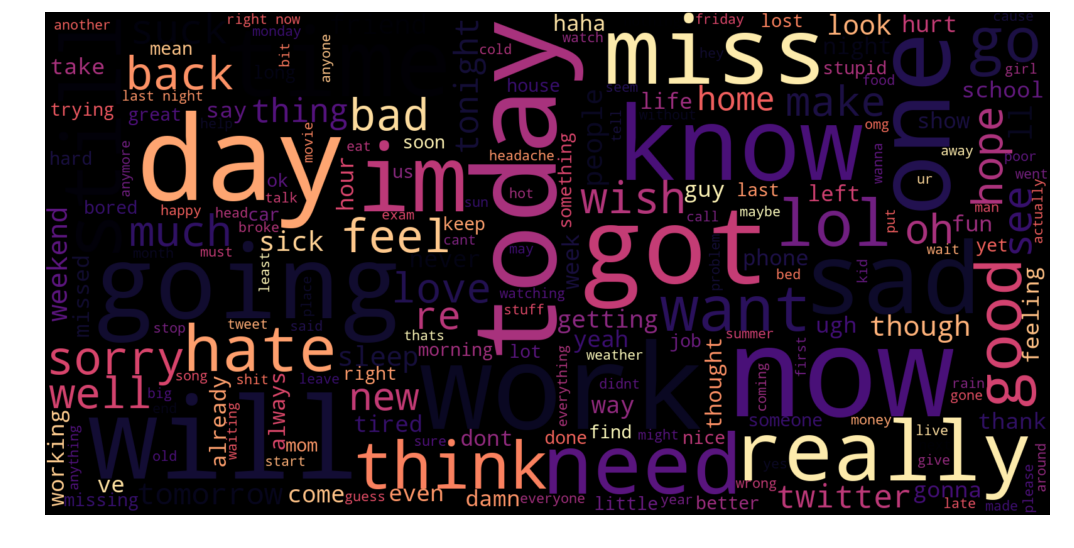

In [20]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').\
generate(dfRep[dfRep.sentiment==0].Cleaned.str.cat(sep=' '))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Neutral

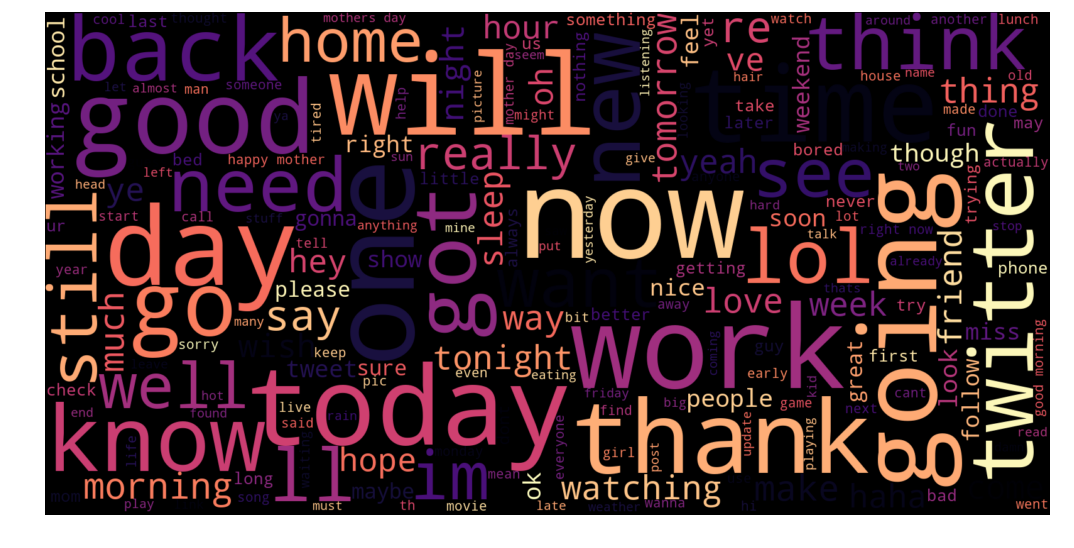

In [21]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').\
generate(dfRep[dfRep.sentiment==2].Cleaned.str.cat(sep=' '))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))

wordnet_lemmatizer=WordNetLemmatizer()

dfRepCount = dfRep.groupby('sentiment').Cleaned.apply(lambda x: ' '.join(x)).\
apply(lambda x: Counter([wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if k not in english_stops]]).most_common(25))
dfRepCount

sentiment
0    [(day, 1105), (get, 993), (go, 883), (work, 869), (like, 855), (got, 789), (today, 718), (going,...
2    [(day, 540), (get, 439), (go, 426), (work, 395), (good, 383), (like, 373), (one, 358), (got, 347...
4    [(day, 2053), (love, 1298), (good, 1285), (happy, 1167), (mother, 969), (lol, 804), (like, 750),...
Name: Cleaned, dtype: object

In [23]:
import operator

a = list(map(operator.itemgetter(1), dfRepCount[4]))
b = list(map(operator.itemgetter(0), dfRepCount[4]))

Text(0.5,1,'Top 25 tokens in happy tweets')

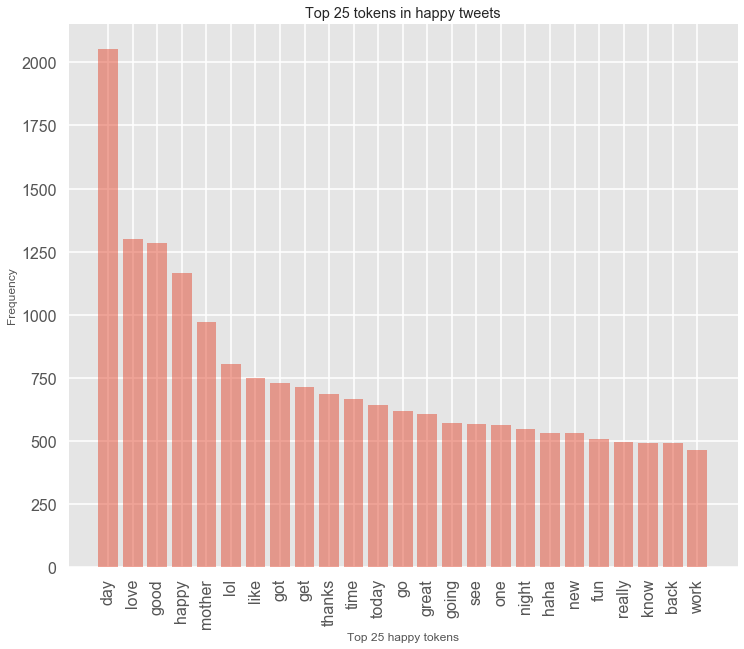

In [24]:
y_pos = np.arange(25)
plt.figure(figsize=(12,10))
plt.bar(y_pos, a, align='center', alpha=0.5)
plt.xticks(y_pos, b ,rotation='vertical')

plt.ylabel('Frequency')
plt.xlabel('Top 25 happy tokens')
plt.title('Top 25 tokens in happy tweets')

Text(0.5,1,'Top 25 tokens in neutral tweets')

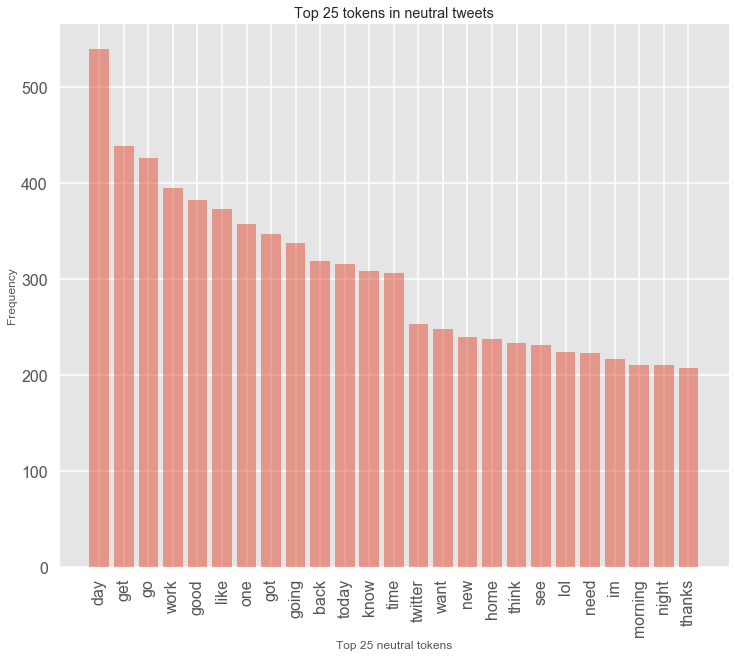

In [25]:
a = list(map(operator.itemgetter(1), dfRepCount[2]))
b = list(map(operator.itemgetter(0), dfRepCount[2]))
y_pos = np.arange(25)
plt.figure(figsize=(12,10))
plt.bar(y_pos, a, align='center', alpha=0.5)
plt.xticks(y_pos, b ,rotation='vertical')

plt.ylabel('Frequency')
plt.xlabel('Top 25 neutral tokens')
plt.title('Top 25 tokens in neutral tweets')

Text(0.5,1,'Top 25 tokens in sad tweets')

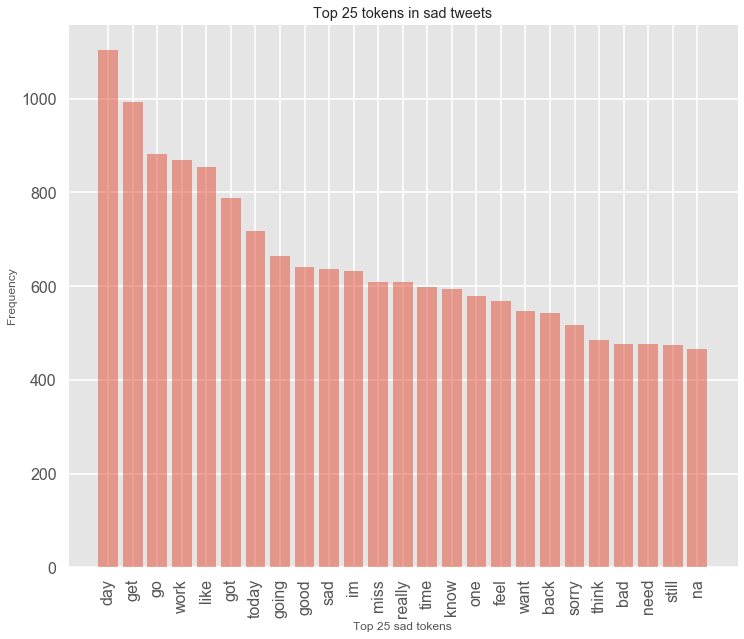

In [26]:
a = list(map(operator.itemgetter(1), dfRepCount[0]))
b = list(map(operator.itemgetter(0), dfRepCount[0]))

y_pos = np.arange(25)
plt.figure(figsize=(12,10))
plt.bar(y_pos, a, align='center', alpha=0.5)
plt.xticks(y_pos, b ,rotation='vertical')

plt.ylabel('Frequency')
plt.xlabel('Top 25 sad tokens')
plt.title('Top 25 tokens in sad tweets')

### Word Manipulation with Tokenization

In [27]:
from collections import Counter
from nltk.tokenize import word_tokenize


dfRep.Cleaned.apply(lambda x:Counter(t.lower() for t in word_tokenize(x)).most_common(10)).head(10)

0    [(know, 1), (was, 1), (listenin, 1), (to, 1), (bad, 1), (habit, 1), (earlier, 1), (and, 1), (sta...
1    [(layin, 1), (bed, 1), (with, 1), (headache, 1), (ughhhh, 1), (waitin, 1), (on, 1), (your, 1), (...
2                                                [(funeral, 1), (ceremony, 1), (gloomy, 1), (friday, 1)]
3                         [(wants, 1), (to, 1), (hang, 1), (out, 1), (with, 1), (friends, 1), (soon, 1)]
4    [(we, 1), (want, 1), (to, 1), (trade, 1), (with, 1), (someone, 1), (who, 1), (has, 1), (houston,...
5    [(did, 2), (not, 2), (my, 2), (re, 1), (pinging, 1), (why, 1), (you, 1), (go, 1), (to, 1), (prom...
6    [(but, 2), (he, 2), (should, 1), (be, 1), (sleep, 1), (im, 1), (not, 1), (thinking, 1), (about, ...
7                                                                        [(hmmm, 1), (is, 1), (down, 1)]
8                                               [(charlene, 1), (my, 1), (love, 1), (miss, 1), (you, 1)]
9                                                [(sorr

In [28]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))

In [29]:
wordnet_lemmatizer=WordNetLemmatizer()

dfRep.groupby('sentiment').content.apply(lambda x: ' '.join(x)).\
apply(lambda x: Counter([wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if k not in english_stops]]).most_common(5))

sentiment
0             [(day, 1047), (get, 988), (go, 878), (work, 854), (like, 853)]
2              [(http, 602), (day, 474), (get, 436), (quot, 424), (go, 422)]
4    [(day, 1990), (love, 1289), (good, 1276), (happy, 1156), (mother, 959)]
Name: content, dtype: object

In [30]:
X= np.array(dfRep.groupby('sentiment').content.apply(lambda x: ' '.join(x)).\
apply(lambda x: Counter([wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if k not in english_stops]]).most_common(3)[0]).\
apply(lambda x: x[0]))


Y = np.array(dfRep.groupby('sentiment').content.apply(lambda x: ' '.join(x)).\
apply(lambda x: Counter([wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if k not in english_stops]]).most_common(3)[0]).\
apply(lambda x: x[1]))

In [31]:
Xnew = []

for word,sentiment in zip(X, dfRep.groupby('sentiment').sentiment.count().index):
    Xnew.append(word+'_'+str(sentiment))
    
print(Xnew)

['day_0', 'http_2', 'day_4']


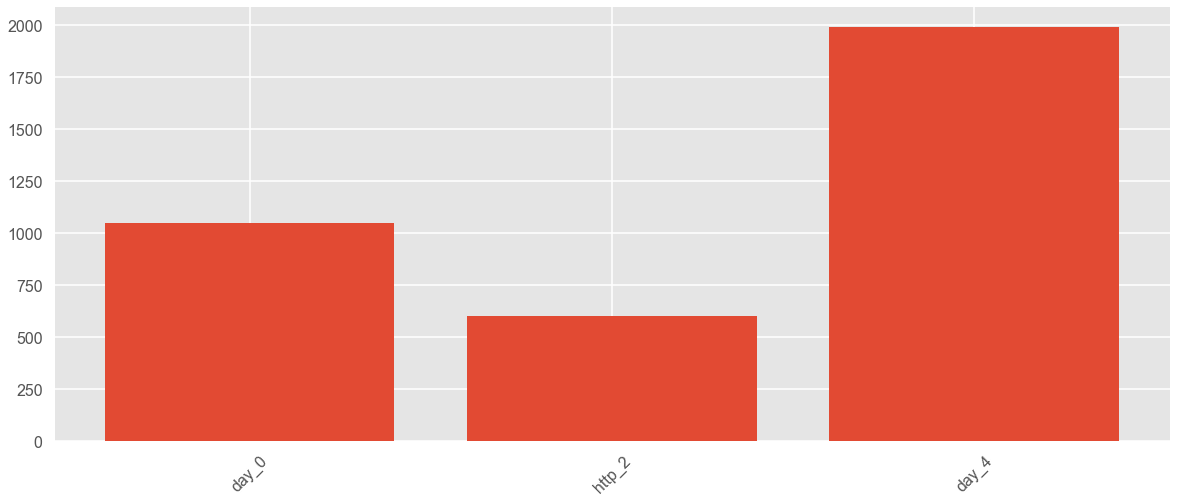

In [32]:
plt.subplots(figsize=(20,8))
plt.bar(Xnew,Y)
plt.xticks(rotation=45)
plt.show()

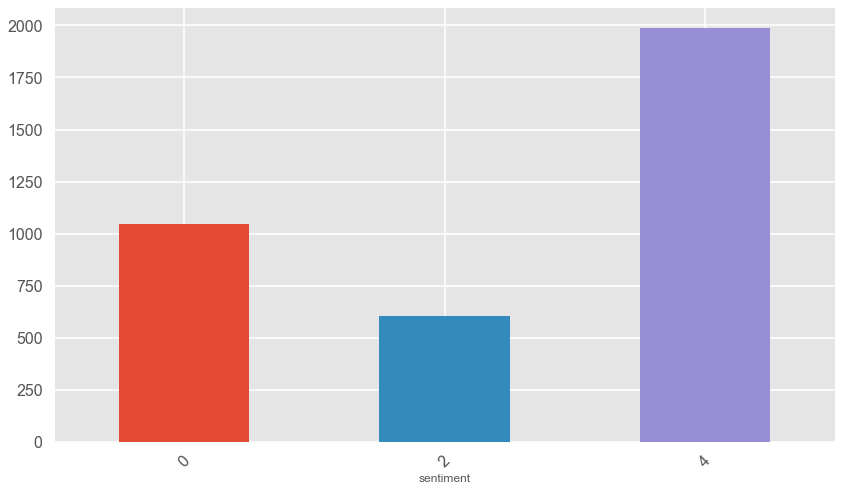

In [33]:
plt.subplots(figsize=(14,8))


dfRep.groupby('sentiment').content.apply(lambda x: ' '.join(x)).\
apply(lambda x: Counter([wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if k not in english_stops]]).most_common(3)[0]).\
apply(lambda x: x[1]).plot(kind='bar')

plt.xticks(rotation=45)
    
plt.show()

In [34]:
dfRep['NewContent'] = dfRep.content.\
apply(lambda x: [wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if k not in english_stops]]).\
apply(lambda x: " ".join(x))

### Additional Tweet

In [35]:
dfAdd = pd.read_csv('out3.csv', index_col=0)

In [36]:
dfAdd.head()

,sentiment,content
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Thi..."
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School to...
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a..."


In [37]:
dfAdd.iloc[:,0].value_counts()

4    10000
0    10000
Name: sentiment, dtype: int64

In [38]:
dfAdd.columns=['sentiment','NewContent']

In [39]:
dfAdd.head()

,sentiment,NewContent
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Thi..."
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School to...
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a..."


In [40]:
dfAdd.shape

(20000, 2)

In [41]:
dfAdd['NewContent'] = dfAdd['NewContent'].\
apply(lambda x: [wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if k not in english_stops]]).\
apply(lambda x: " ".join(x))

In [42]:
dfAdd.head()

,sentiment,NewContent
0,0,switchfoot http awww bummer shoulda got david carr third day
1,0,upset ca update facebook texting might cry result school today also blah
2,0,kenichan dived many time ball managed save rest go bound
3,0,whole body feel itchy like fire
4,0,nationwideclass behaving mad ca see


### Split the model

In [43]:
dfAddN = pd.DataFrame({'Content':pd.concat([dfRep['NewContent'],dfAdd['NewContent']], ignore_index=True),'sentiment':\
pd.concat([dfRep['sentiment'],dfAdd['sentiment']],ignore_index=True)})
dfAddN.head()

,Content,sentiment
0,tiffanylue know listenin bad habit earlier started freakin part,2
1,layin n bed headache ughhhh waitin call,0
2,funeral ceremony gloomy friday,0
3,want hang friend soon,4
4,dannycastillo want trade someone houston ticket one,2


In [44]:
dfAddN.shape

(60000, 2)

In [45]:
dfAddN.sentiment.value_counts()

4    25299
0    25236
2     9465
Name: sentiment, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfAddN['Content'],
                                                    dfAddN['sentiment'],
                                                    test_size=.25, random_state=53)

### CountVectorizing

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_train = cv.fit_transform(X_train)
cv_train = cv_train.toarray()
cv_test = cv.transform(X_test)
cv_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
vocab = cv.get_feature_names()
pd.DataFrame(cv_train, columns=vocab).head()

,aa,aaa,aaaa,aaaaaa,aaaaaaaa,aaaaaaaaaaa,aaaaaaaaaahhhhhhhh,aaaaaaaaaamazing,aaaaaaaaah,aaaaaaaafternoon,aaaaaaaahhhhhhhh,aaaaaah,aaaaaahhhhhhhh,aaaaaawwwesome,aaaaages,aaaaahhhh,aaaaall,aaaaand,aaaaaoouoouoouu,aaaaargh,aaaaarrrrggghhh,aaaaaw,aaaaawwwwwww,aaaagh,aaaah,aaaahhhh,aaaaiieee,aaaargh,aaaarh,aaaau,aaaawww,aaaawwwww,aaah,aaahh,aaahhh,aaahhhh,aaalisson,aaamyzing,aaand,aaarrrgggghhh,aaarrrggghhh,aaarrrrrgh,aaaw,aaawww,aac,aaghh,aah,aahh,aahhh,aahhhh,aahoogendoorn,aalsmeer,aamelia,aanddfilms,aanneeb,aannndd,aargh,aaron,aaronbishop,aaronlhb,aaronmarshmusic,aaronmbaer,aaronob,aaronovitch,aaronrva,aaronshale,aaronwarner,aarrgghh,aasahan,aat,aatw,aaw,aaww,aawww,aawwwww,aayushsoni,ab,aba,ababyblueeyes,abaggy,abandon,abandoned,abandoning,abandonment,abang,abans,abarkerwoof,abay,abba,abbey,abbie,abbreviation,abbster,abbu,abby,abbyjeanne,abbyluvsaj,abbyro,abc,abcddesigns,abcdude,abd,abdc,abducted,abduzeedo,abeeken,abeen,abeerak,abeerforbill,aber,aberdeen,abey,abguerraartist,abhi,abhian,abhor,abhorredlife,abhorrentbm,abiban,abiding,abies,abiface,abigaildsouza,abigaillovesyou,ability,abis,abisignorelli,abit,able,abledragon,ableton,abnormal,aboard,abomination,abort,abortion,abougu,abounds,aboutcha,aboutk,aboutlittlerock,abouts,aboutt,aboutthelettera,abouttttto,aboutvetmed,aboveallfabric,abp,abraham,abrams,...,zb,zbender,zbrush,zc,zcs,zdf,ze,zealand,zeb,zebra,zecool,zeddessarts,zedomaxbiz,zedshaw,zee,zeemalmer,zeenell,zef,zefer,zefrank,zefron,zeil,zeiss,zeitgeist,zeke,zekemurphy,zeker,zeland,zelciia,zelda,zeldman,zelenka,zelenski,zemote,zen,zenaweist,zendoc,zenh,zenithus,zenjar,zenobeach,zenojones,zensify,zepinklady,zeralyn,zergmoney,zero,zerogeewhiz,zeta,zewdy,zhayrar,zhighlife,zhonguoren,zhuhe,zhundred,ziggy,zillaman,zimbabwe,zimmer,zimmermann,zinc,zincroof,zindaret,zindelayentl,zing,zingtoh,zinziii,zion,zionxpress,zip,zippy,zippys,zipz,zirconcode,zit,ziua,ziv,znatrainer,zo,zoe,zoeatthedisco,zoecello,zoecorkhill,zoeelouise,zoelovesarchie,zoexander,zoey,zoidberg,zoids,zojuist,zokathepuppy,zomberellamcfox,zombie,zombiefarmer,zombienicholas,zomg,zommgg,zone,zoned,zongzi,zoo,zoom,zoombezi,zoomed,zoozoo,zopfliesejule,zoriancrx,zotz,zouljiin,zownder,zrhero,zrovna,zsafwan,zshoup,ztnewetnorb,zu,zuccini,zukyleigh,zulkey,zulu,zum,zumafire,zumba,zune,zuppalizzle,zur,zuraidah,zurairi,zurich,zurieventsllc,zurplemoon,zut,zuzu,zuzusu,zwaloo,zwarte,zwriter,zydrate,zygoatsalami,zyrtec,zzap,zzerbe,zzs,zzybug,zzz,zzzz,zzzzy,zzzzzz,zzzzzzz,zzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,

### Tf-idf Vectorization

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_train = tv.fit_transform(X_train)
tv_train = tv_train.toarray()
tv_test = tv.transform(X_test)

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_train, 2), columns=vocab).head()

,aa,aaa,aaaa,aaaaaa,aaaaaaaa,aaaaaaaaaaa,aaaaaaaaaahhhhhhhh,aaaaaaaaaamazing,aaaaaaaaah,aaaaaaaafternoon,aaaaaaaahhhhhhhh,aaaaaah,aaaaaahhhhhhhh,aaaaaawwwesome,aaaaages,aaaaahhhh,aaaaall,aaaaand,aaaaaoouoouoouu,aaaaargh,aaaaarrrrggghhh,aaaaaw,aaaaawwwwwww,aaaagh,aaaah,aaaahhhh,aaaaiieee,aaaargh,aaaarh,aaaau,aaaawww,aaaawwwww,aaah,aaahh,aaahhh,aaahhhh,aaalisson,aaamyzing,aaand,aaarrrgggghhh,aaarrrggghhh,aaarrrrrgh,aaaw,aaawww,aac,aaghh,aah,aahh,aahhh,aahhhh,aahoogendoorn,aalsmeer,aamelia,aanddfilms,aanneeb,aannndd,aargh,aaron,aaronbishop,aaronlhb,aaronmarshmusic,aaronmbaer,aaronob,aaronovitch,aaronrva,aaronshale,aaronwarner,aarrgghh,aasahan,aat,aatw,aaw,aaww,aawww,aawwwww,aayushsoni,ab,aba,ababyblueeyes,abaggy,abandon,abandoned,abandoning,abandonment,abang,abans,abarkerwoof,abay,abba,abbey,abbie,abbreviation,abbster,abbu,abby,abbyjeanne,abbyluvsaj,abbyro,abc,abcddesigns,abcdude,abd,abdc,abducted,abduzeedo,abeeken,abeen,abeerak,abeerforbill,aber,aberdeen,abey,abguerraartist,abhi,abhian,abhor,abhorredlife,abhorrentbm,abiban,abiding,abies,abiface,abigaildsouza,abigaillovesyou,ability,abis,abisignorelli,abit,able,abledragon,ableton,abnormal,aboard,abomination,abort,abortion,abougu,abounds,aboutcha,aboutk,aboutlittlerock,abouts,aboutt,aboutthelettera,abouttttto,aboutvetmed,aboveallfabric,abp,abraham,abrams,...,zb,zbender,zbrush,zc,zcs,zdf,ze,zealand,zeb,zebra,zecool,zeddessarts,zedomaxbiz,zedshaw,zee,zeemalmer,zeenell,zef,zefer,zefrank,zefron,zeil,zeiss,zeitgeist,zeke,zekemurphy,zeker,zeland,zelciia,zelda,zeldman,zelenka,zelenski,zemote,zen,zenaweist,zendoc,zenh,zenithus,zenjar,zenobeach,zenojones,zensify,zepinklady,zeralyn,zergmoney,zero,zerogeewhiz,zeta,zewdy,zhayrar,zhighlife,zhonguoren,zhuhe,zhundred,ziggy,zillaman,zimbabwe,zimmer,zimmermann,zinc,zincroof,zindaret,zindelayentl,zing,zingtoh,zinziii,zion,zionxpress,zip,zippy,zippys,zipz,zirconcode,zit,ziua,ziv,znatrainer,zo,zoe,zoeatthedisco,zoecello,zoecorkhill,zoeelouise,zoelovesarchie,zoexander,zoey,zoidberg,zoids,zojuist,zokathepuppy,zomberellamcfox,zombie,zombiefarmer,zombienicholas,zomg,zommgg,zone,zoned,zongzi,zoo,zoom,zoombezi,zoomed,zoozoo,zopfliesejule,zoriancrx,zotz,zouljiin,zownder,zrhero,zrovna,zsafwan,zshoup,ztnewetnorb,zu,zuccini,zukyleigh,zulkey,zulu,zum,zumafire,zumba,zune,zuppalizzle,zur,zuraidah,zurairi,zurich,zurieventsllc,zurplemoon,zut,zuzu,zuzusu,zwaloo,zwarte,zwriter,zydrate,zygoatsalami,zyrtec,zzap,zzerbe,zzs,zzybug,zzz,zzzz,zzzzy,zzzzzz,zzzzzzz,zzzzzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(random_state=0)

logreg.fit(cv_train, y_train)

pred = logreg.predict(cv_test)

metrics.accuracy_score(pred, y_test)

0.6065333333333334

### Linear SVC

In [51]:
from sklearn.svm import LinearSVC

Lsvc = LinearSVC()

Lsvc.fit(cv_train, y_train)

pred= Lsvc.predict(cv_test)

metrics.accuracy_score(y_test, pred)

0.5749333333333333

### Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

nb_classifier.fit(cv_train, y_train)

pred = nb_classifier.predict(cv_test)

metrics.accuracy_score(y_test, pred)

0.6098

### Logistic Regression over OneVsRestClassifier

In [53]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = OneVsRestClassifier(LogisticRegression())

clf.fit(cv_train, y_train)

pred= clf.predict(cv_test)

metrics.accuracy_score(pred,y_test)

0.6065333333333334

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, 
                              ngram_range=(1, 1), classifier=lr):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        sentiment_fit = checker_pipeline.fit(X_train, y_train)
        y_pred = sentiment_fit.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print("accuracy score: {0:.2f}%".format(accuracy*100))        
        result.append((n,accuracy))
    return result

In [55]:
print("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
accuracy score: 60.26%
Validation result for 20000 features
accuracy score: 60.10%
Validation result for 30000 features
accuracy score: 60.15%
Validation result for 40000 features
accuracy score: 60.24%
Validation result for 50000 features
accuracy score: 60.21%
Validation result for 60000 features
accuracy score: 60.21%
Validation result for 70000 features
accuracy score: 60.21%
Validation result for 80000 features
accuracy score: 60.21%
Validation result for 90000 features
accuracy score: 60.21%
Validation result for 100000 features
accuracy score: 60.21%


In [56]:
print("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(stop_words='english',ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
accuracy score: 60.08%
Validation result for 20000 features
accuracy score: 59.59%
Validation result for 30000 features
accuracy score: 59.79%
Validation result for 40000 features
accuracy score: 59.73%
Validation result for 50000 features
accuracy score: 59.94%
Validation result for 60000 features
accuracy score: 59.97%
Validation result for 70000 features
accuracy score: 59.98%
Validation result for 80000 features
accuracy score: 59.99%
Validation result for 90000 features
accuracy score: 60.13%
Validation result for 100000 features
accuracy score: 60.30%


In [57]:
print("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(stop_words='english',ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
accuracy score: 59.94%
Validation result for 20000 features
accuracy score: 59.57%
Validation result for 30000 features
accuracy score: 59.85%
Validation result for 40000 features
accuracy score: 59.90%
Validation result for 50000 features
accuracy score: 59.89%
Validation result for 60000 features
accuracy score: 59.95%
Validation result for 70000 features
accuracy score: 59.94%
Validation result for 80000 features
accuracy score: 60.14%
Validation result for 90000 features
accuracy score: 60.20%
Validation result for 100000 features
accuracy score: 60.17%


## TF-IDF Vectorizer

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

print("RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
accuracy score: 61.83%
Validation result for 20000 features
accuracy score: 62.10%
Validation result for 30000 features
accuracy score: 62.10%
Validation result for 40000 features
accuracy score: 62.06%
Validation result for 50000 features
accuracy score: 62.08%
Validation result for 60000 features
accuracy score: 62.08%
Validation result for 70000 features
accuracy score: 62.08%
Validation result for 80000 features
accuracy score: 62.08%
Validation result for 90000 features
accuracy score: 62.08%
Validation result for 100000 features
accuracy score: 62.08%


In [59]:
print("RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
accuracy score: 61.71%
Validation result for 20000 features
accuracy score: 61.87%
Validation result for 30000 features
accuracy score: 62.09%
Validation result for 40000 features
accuracy score: 62.22%
Validation result for 50000 features
accuracy score: 62.18%
Validation result for 60000 features
accuracy score: 62.15%
Validation result for 70000 features
accuracy score: 62.14%
Validation result for 80000 features
accuracy score: 62.09%
Validation result for 90000 features
accuracy score: 62.14%
Validation result for 100000 features
accuracy score: 62.17%


In [60]:
print("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
accuracy score: 61.72%
Validation result for 20000 features
accuracy score: 62.04%
Validation result for 30000 features
accuracy score: 62.14%
Validation result for 40000 features
accuracy score: 62.23%
Validation result for 50000 features
accuracy score: 62.21%
Validation result for 60000 features
accuracy score: 62.19%
Validation result for 70000 features
accuracy score: 62.21%
Validation result for 80000 features
accuracy score: 62.15%
Validation result for 90000 features
accuracy score: 62.06%
Validation result for 100000 features
accuracy score: 62.22%


## Model Comparison

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

In [62]:
tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, 
                          ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print("Validation result for {} features".format(n))
        sentiment_fit = checker_pipeline.fit(X_train, y_train)
        y_pred = sentiment_fit.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print("accuracy score: {0:.2f}%".format(accuracy*100))
        result.append((n,accuracy))
    return result

In [63]:
trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

Validation result for Logistic Regression features
accuracy score: 62.22%
Validation result for Linear SVC features
accuracy score: 59.30%
Validation result for LinearSVC with L1-based feature selection features
accuracy score: 59.80%
Validation result for Multinomial NB features
accuracy score: 61.57%
Validation result for Bernoulli NB features
accuracy score: 61.41%
Validation result for Ridge Classifier features
accuracy score: 60.56%
Validation result for AdaBoost features
accuracy score: 55.87%
Validation result for Perceptron features
accuracy score: 54.71%
Validation result for Passive-Aggresive features
accuracy score: 56.85%
Validation result for Nearest Centroid features
accuracy score: 53.91%


### Doc2Vec

In [64]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
import multiprocessing
from sklearn import utils

In [65]:
def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
    return result

In [66]:
all_x = pd.concat([X_train,X_test])
all_x_w2v = labelize_tweets_ug(all_x, 'all')

In [67]:
len(all_x_w2v)

60000

### DBOW

In [68]:
cores = multiprocessing.cpu_count()

model_ug_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

100%|██████████| 60000/60000 [00:00<00:00, 956697.19it/s]


In [70]:
model_ug_dbow.most_similar('good')

[('amydewitt', 0.41144832968711853),
 ('sail', 0.37934568524360657),
 ('journalist', 0.3675581216812134),
 ('aswell', 0.3575114905834198),
 ('schoolmate', 0.3481082022190094),
 ('crochet', 0.34725624322891235),
 ('donnanorgren', 0.3442573845386505),
 ('whaaat', 0.3432570993900299),
 ('chk', 0.3371010720729828),
 ('ohh', 0.3351868987083435)]

In [69]:
model_ug_dbow.most_similar('happy')

[('richardepryor', 0.42304790019989014),
 ('genuine', 0.37551045417785645),
 ('hardcore', 0.3582051396369934),
 ('memo', 0.35661834478378296),
 ('supposedly', 0.3491385579109192),
 ('mon', 0.3368760347366333),
 ('bubbly', 0.3354552388191223),
 ('gender', 0.329425185918808),
 ('cloth', 0.32723864912986755),
 ('foe', 0.3246641159057617)]

In [71]:
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs

In [72]:
train_vecs_dbow = get_vectors(model_ug_dbow, X_train, 100)
test_vecs_dbow = get_vectors(model_ug_dbow, X_test, 100)

In [73]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
clf.score(test_vecs_dbow, y_test)

0.417

### Distributed Momory (concatenated)

In [75]:
cores = multiprocessing.cpu_count()
model_ug_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, 
                       min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmc.build_vocab([x for x in tqdm(all_x_w2v)])

100%|██████████| 60000/60000 [00:00<00:00, 939910.59it/s]


In [76]:
train_vecs_dmc = get_vectors(model_ug_dmc, X_train, 100)
test_vecs_dmc = get_vectors(model_ug_dmc, X_test, 100)

In [77]:
clf = LogisticRegression()
clf.fit(train_vecs_dmc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
clf.score(test_vecs_dmc, y_test)

0.417

### Distributed Memory (mean)

In [79]:
cores = multiprocessing.cpu_count()
model_ug_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, 
                       min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmm.build_vocab([x for x in tqdm(all_x_w2v)])

100%|██████████| 60000/60000 [00:00<00:00, 987623.19it/s]


In [80]:
train_vecs_dmm = get_vectors(model_ug_dmm, X_train, 100)
test_vecs_dmm = get_vectors(model_ug_dmm, X_test, 100)

In [81]:
clf = LogisticRegression()
clf.fit(train_vecs_dmm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
clf.score(test_vecs_dmm, y_test)

0.417

In [83]:
def get_concat_vectors(model1,model2, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
        n += 1
    return vecs

### Phrase Modeling

In [84]:
from gensim.models.phrases import Phrases
from gensim.models.phrases import Phraser

In [85]:
tokenized_train = [t.split() for t in X_train]

In [86]:
phrases = Phrases(tokenized_train)
bigram = Phraser(phrases)

In [88]:
X_train[21433]

'amreldib let hope retirment cancelled reason'

In [90]:
bigram[X_train[21433].split()]

['amreldib', 'let', 'hope', 'retirment', 'cancelled', 'reason']

In [91]:
def labelize_tweets_bg(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(bigram[t.split()], [prefix + '_%s' % i]))
    return result

In [92]:
all_x = pd.concat([X_train,X_test])
all_x_w2v = labelize_tweets_ug(all_x, 'all')

In [93]:
### DBOW
cores = multiprocessing.cpu_count()

model_ug_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

100%|██████████| 60000/60000 [00:00<00:00, 999528.31it/s]


In [94]:
train_vecs_dbow = get_vectors(model_ug_dbow, X_train, 100)
test_vecs_dbow = get_vectors(model_ug_dbow, X_test, 100)

In [95]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
clf.score(test_vecs_dbow, y_test)

0.417

### Dimension Reduction

In [97]:
tvec = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
x_train_tfidf = tvec.fit_transform(X_train)
x_test_tfidf = tvec.transform(X_test)

#### Chi2 Feature Selection

In [98]:
from sklearn.feature_selection import chi2
chi2score = chi2(x_train_tfidf, y_train)[0]

Text(0.5,0,'$\\chi^2$')

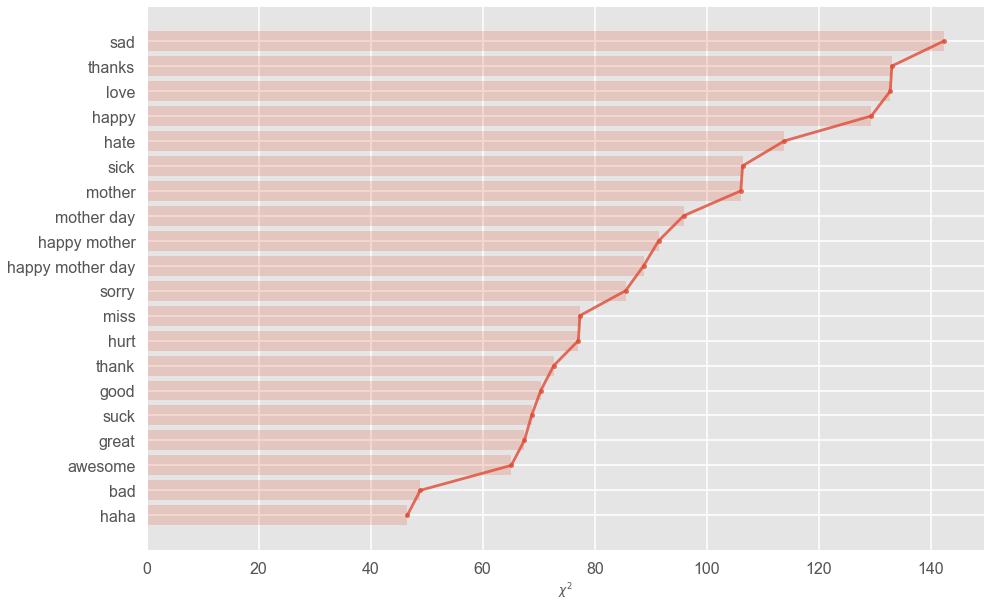

In [99]:
plt.figure(figsize=(15,10))
wscores = zip(tvec.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

### Topic Modeling

In [87]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_topics=3, max_iter=100, random_state=0)
dt_train = lda.fit_transform(cv_train)
dt_test = lda.transform(cv_test)

features = pd.DataFrame(dt_train, columns=['T1', 'T2', 'T3'])
features

/usr/local/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


,T1,T2,T3
0,0.041684,0.243554,0.714762
1,0.925560,0.037359,0.037080
2,0.925418,0.037301,0.037282
3,0.026618,0.762926,0.210455
4,0.048124,0.049001,0.902875
5,0.830821,0.085682,0.083498
6,0.028106,0.943740,0.028154
7,0.033676,0.932924,0.033400
8,0.024049,0.101810,0.874142
9,0.066777,0.066699,0.866524


## Confusion Matrix

In [100]:
metrics.confusion_matrix(y_test, pred)

array([[4509,  197, 1645],
       [1039,  182, 1206],
       [1568,  247, 4407]])

### Confusion Matrix Visualization

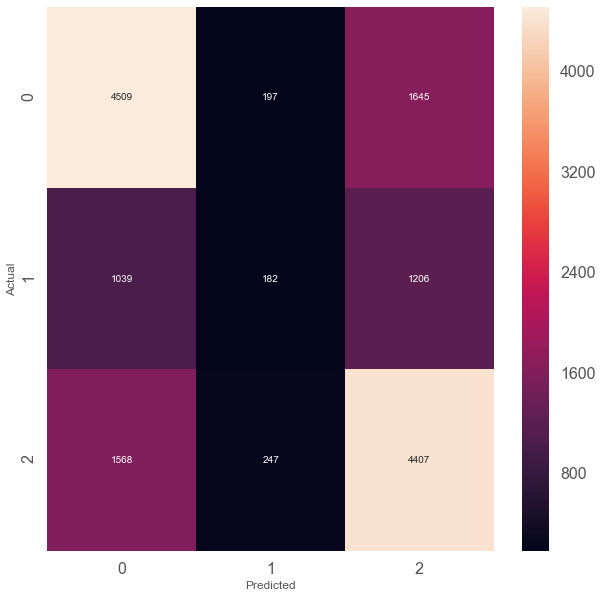

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = metrics.confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Deep Learning on Twitter Analysis

In [102]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(dfRep.NewContent)

print(tokenizer.word_index)

Using TensorFlow backend.


{'day': 1, 'good': 2, 'get': 3, 'like': 4, 'go': 5, 'quot': 6, 'got': 7, 'http': 8, 'love': 9, 'work': 10, 'u': 11, 'today': 12, 'going': 13, 'time': 14, 'one': 15, 'happy': 16, 'lol': 17, 'know': 18, 'back': 19, 'really': 20, 'im': 21, 'mother': 22, 'see': 23, 'want': 24, 'amp': 25, 'ca': 26, 'night': 27, 'think': 28, 'new': 29, 'home': 30, 'well': 31, 'thanks': 32, 'na': 33, 'oh': 34, 'still': 35, 'much': 36, 'need': 37, 'miss': 38, 'feel': 39, 'last': 40, 'great': 41, 'make': 42, 'hope': 43, 'morning': 44, 'would': 45, 'twitter': 46, 'haha': 47, 'wish': 48, 'fun': 49, 'week': 50, 'tomorrow': 51, 'could': 52, 'sad': 53, 'tonight': 54, 'thing': 55, 'sorry': 56, 'bad': 57, 'friend': 58, 'right': 59, 'look': 60, 'come': 61, 'nice': 62, 'gon': 63, 'mom': 64, 'though': 65, 'better': 66, 'say': 67, 'way': 68, 'yeah': 69, 'sleep': 70, 'weekend': 71, 'getting': 72, 'people': 73, 'hate': 74, 'bed': 75, 'hour': 76, 'next': 77, 'school': 78, 'guy': 79, 'show': 80, 'lt': 81, 'dont': 82, 'watchin

In [103]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(dfRep.NewContent)
X = pad_sequences(X)
print(X)

[[   0    0    0 ...  464  959  350]
 [   0    0    0 ...  288 1938  163]
 [   0    0    0 ... 1939 1475  130]
 ...
 [   0    0    0 ...   96  157    1]
 [   0    0    0 ... 1061   11  254]
 [   0    0    0 ... 1737  212  773]]


In [104]:
Y = []
for val in dfRep.sentiment:
    if(val == 4):
        Y.append([1,0,0])
    elif (val==2):
        Y.append([0,1,0])
    else:
        Y.append([0,0,1])
Y = np.array(Y)
print(Y)

[[0 1 0]
 [0 0 1]
 [0 0 1]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [105]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X,Y,test_size=0.2)

### For 3 feelings 'happy', 'sad', 'neutral'

In [106]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM

model = Sequential()
model.add(Embedding(2500,128,input_length=X.shape[1],dropout=0.2))
model.add(LSTM(300, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(3,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])



In [107]:
model.fit(X_tr ,y_tr, epochs=5,verbose=2,batch_size=32)


Epoch 1/5
 - 118s - loss: 0.9404 - acc: 0.5573
Epoch 2/5
 - 119s - loss: 0.8653 - acc: 0.6136
Epoch 3/5
 - 118s - loss: 0.8350 - acc: 0.6314
Epoch 4/5
 - 119s - loss: 0.8003 - acc: 0.6504
Epoch 5/5
 - 119s - loss: 0.7635 - acc: 0.6690


In [108]:
print(model.evaluate(X_ts,y_ts)[1])

8000/8000 [==============================] - 10s 1ms/step
0.56225
